In [1]:
using DSP
using CRC
using Plots

gr()

Plots.GRBackend()

In [2]:
f = 6e6;
τ = 1e-3;
n = τ*f;

The last two words will be replaced with a value close to 0V (0x0800) when programmed.

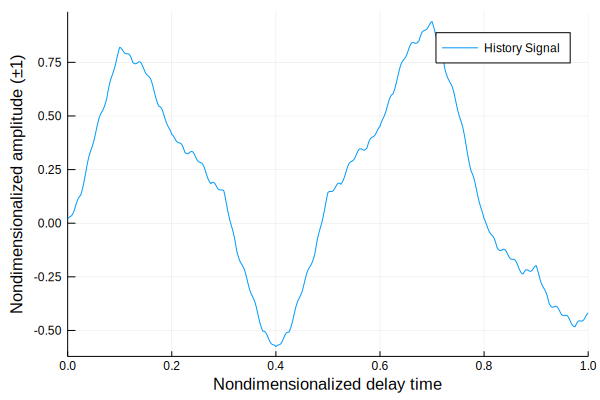

In [88]:
g(t) = 0.45 * (0.9 * sin(t * 2.5*3π / 2) * atan(8π * t) - 0.1 * abs(atan(sec(t * 20π))) - 0.5 * abs(atan(cot(t * 5π))) + 0.02 * cos(100π * t)) + 0.4;
ts = (0:n-1) / (n-1);
gs = g.(ts);
plot(ts, gs, xlim=(0, 1),
xlabel = "Nondimensionalized delay time", ylabel = "Nondimensionalized amplitude (±1)", label = "History Signal")

#### little_endian(x) = UInt8.([x & 0x00FF, x >> 8]);

In [89]:
prog_words = UInt16.(round.(2^(12 - 1) * (1 .+ gs))) .& 0x0FFF;
waveform_file = "./triangle_hist.bin";
write(waveform_file, prog_words)

12000

In [90]:
crc32 = crc(CRC_32);
prog_crc = crc32(vcat(little_endian.(prog_words)...))

0x3574949c